### Importin libraries

In [1]:
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import time

### Dataset

In [2]:
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\heart_disease.csv")

In [3]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


# Dataset Description

This dataset provides information related to heart disease risk factors, containing **10,000 rows** and **21 columns**. Each row represents an individual, and the columns capture demographic, behavioral, and clinical attributes.

## Column Descriptions:
1. **Age**: Age of the individual (in years).
2. **Gender**: Gender of the individual (Male/Female).
3. **Blood Pressure**: Measured blood pressure (in mmHg).
4. **Cholesterol Level**: Total cholesterol level (in mg/dL).
5. **Exercise Habits**: Categorized exercise levels (Low/Medium/High).
6. **Smoking**: Smoking status (Yes/No).
7. **Family Heart Disease**: Family history of heart disease (Yes/No).
8. **Diabetes**: Diabetes status (Yes/No).
9. **BMI**: Body Mass Index, calculated using height and weight.
10. **High Blood Pressure**: Indicator of hypertension (Yes/No).
11. **Low HDL Cholesterol**: Presence of low HDL cholesterol levels (Yes/No).
12. **High LDL Cholesterol**: Presence of high LDL cholesterol levels (Yes/No).
13. **Alcohol Consumption**: Alcohol intake level (None/Low/Medium/High).
14. **Stress Level**: Categorized stress levels (Low/Medium/High).
15. **Sleep Hours**: Average hours of sleep per night.
16. **Sugar Consumption**: Categorized sugar intake (Low/Medium/High).
17. **Triglyceride Level**: Triglyceride levels in the blood (in mg/dL).
18. **Fasting Blood Sugar**: Fasting blood sugar levels (in mg/dL).
19. **CRP Level**: C-reactive protein levels, indicating inflammation.
20. **Homocysteine Level**: Levels of homocysteine in the blood.
21. **Heart Disease Status**: Target variable indicating heart disease presence (Yes/No).

## Summary Statistics:
- **Rows (Observations):** 10,000
- **Columns (Features):** 21
- **Missing Values:** A small proportion of missing data exists across most columns.

## Key Observations:
- The dataset includes both numerical and categorical variables.
- The target column is **Heart Disease Status**, used for classification tasks.
- Missing values are present in columns such as **Age**, **Cholesterol Level**, and **Fasting Blood Sugar**.



#### Count of Missing Values in Each Column:


In [4]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [5]:
df.shape

(10000, 21)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [8]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


#### Data Cleaning

In [9]:
#separate  both columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [10]:
# Handle missing values for numerical columns (using median)
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

In [11]:
# Handle missing values for categorical columns (using mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [12]:
print(df.isnull().sum())

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


#### Applying Ordinal Encoding to Categorical Columns


In [13]:

def dynamic_ordinal_encoder(df, categorical_cols):
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype(str)
            df[col] = df[col].replace('nan', 'Missing')

            unique_values = df[col].unique()
            sorted_values = sorted(unique_values)
            
            # Apply ordinal encoding by assigning a unique index for each sorted value
            encoding_map = {value: idx for idx, value in enumerate(sorted_values)}
            df[col] = df[col].map(encoding_map)
            
        else:
            print(f"Column '{col}' not found in the DataFrame.")
    
    return df

# Apply ordinal encoding
df_encoded = dynamic_ordinal_encoder(df, categorical_cols)
print("Ordinal encoding applied successfully!")
print(df_encoded.head())


Ordinal encoding applied successfully!
    Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0  56.0       1           153.0              155.0                0        1   
1  69.0       0           146.0              286.0                0        0   
2  46.0       1           126.0              216.0                1        0   
3  32.0       0           122.0              293.0                0        1   
4  60.0       1           166.0              242.0                1        1   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  ...  \
0                     1         0  24.991591                    1  ...   
1                     1         1  25.221799                    0  ...   
2                     0         0  29.855447                    0  ...   
3                     1         0  24.130477                    1  ...   
4                     1         1  20.486289                    1  ...   

   High LDL Cholesterol  Alcohol Co

###### observation 
The Ordinal Encoding technique has been successfully applied to the categorical columns in the dataset. Each categorical column has been converted into a numeric form while preserving the inherent order of the categories.

###### Conclusion
This transformation allows machine learning models to handle categorical data more effectively. By encoding the categorical variables as numerical values with their order maintained, the dataset is now better suited for algorithms that require numeric input, such as decision trees or gradient boosting models.



In [14]:
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,0,1,1,0,24.991591,1,...,0,0,2,7.633228,2,342.0,120.0,12.969246,12.387250,0
1,69.0,0,146.0,286.0,0,0,1,1,25.221799,0,...,0,2,0,8.744034,2,133.0,157.0,9.355389,19.298875,0
2,46.0,1,126.0,216.0,1,0,0,0,29.855447,0,...,1,1,1,4.440440,1,393.0,92.0,12.709873,11.230926,0
3,32.0,0,122.0,293.0,0,1,1,0,24.130477,1,...,1,1,0,5.249405,0,293.0,94.0,12.509046,5.961958,0
4,60.0,1,166.0,242.0,1,1,1,1,20.486289,1,...,0,1,0,7.030971,0,263.0,154.0,10.381259,8.153887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0,136.0,243.0,2,1,0,0,18.788791,1,...,1,2,0,6.834954,2,343.0,133.0,3.588814,19.132004,1
9996,38.0,1,172.0,154.0,2,0,0,0,31.856801,1,...,1,2,0,8.247784,1,377.0,83.0,2.658267,9.715709,1
9997,73.0,1,152.0,201.0,0,1,0,1,26.899911,0,...,1,2,1,4.436762,1,248.0,88.0,4.408867,9.492429,1
9998,23.0,1,142.0,299.0,1,1,0,1,34.964026,1,...,1,2,0,8.526329,2,113.0,153.0,7.215634,11.873486,1


In [15]:
print(df.columns)


Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')


#### Visualizing the Distribution of Numerical Features with Histograms

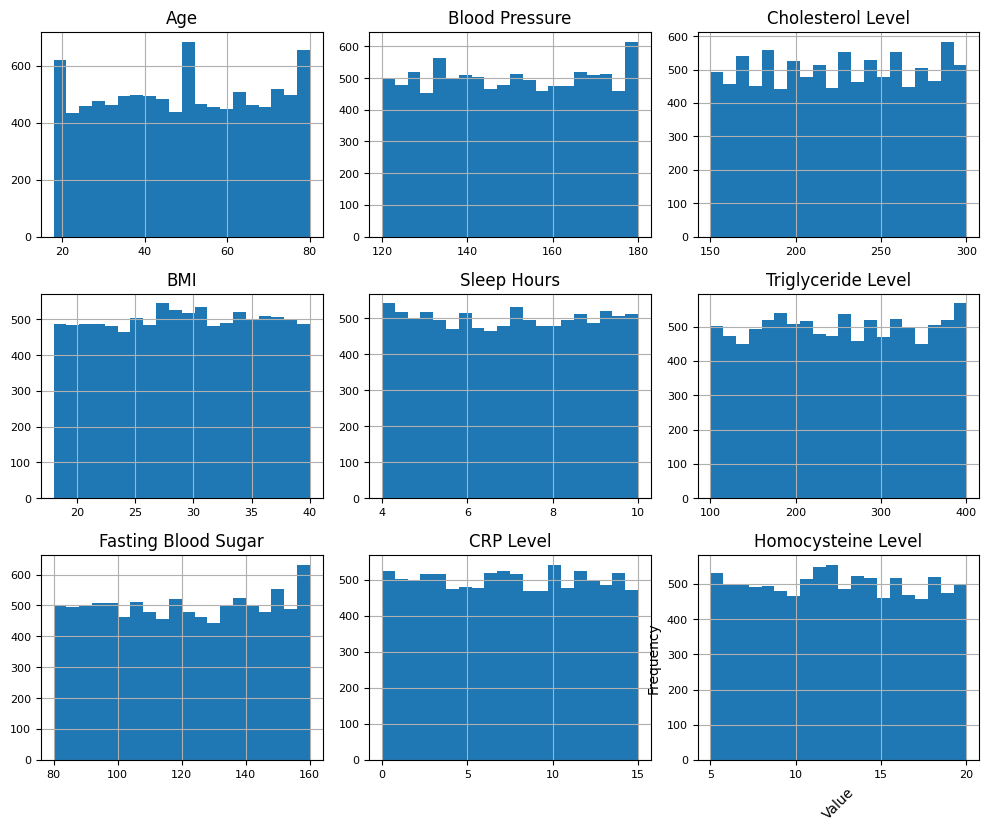

In [16]:
df[numerical_cols].hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.xlabel('Value', fontsize=10 , rotation=45)
plt.ylabel('Frequency', fontsize=10)
plt.show()


###### Observation:
The histograms display the distribution of numerical features, showing how data points are spread across different value ranges. This helps identify skewness, concentration, and outliers in the data.

###### Conclusion:
The histograms allow us to assess whether the features are skewed or balanced. Right-skewed features may indicate outliers or a long tail, while left-skewed features suggest data clustering at higher values. Normal distributions suggest balanced data, which may not require further transformations.

#### Correlation Heatmap of Feature

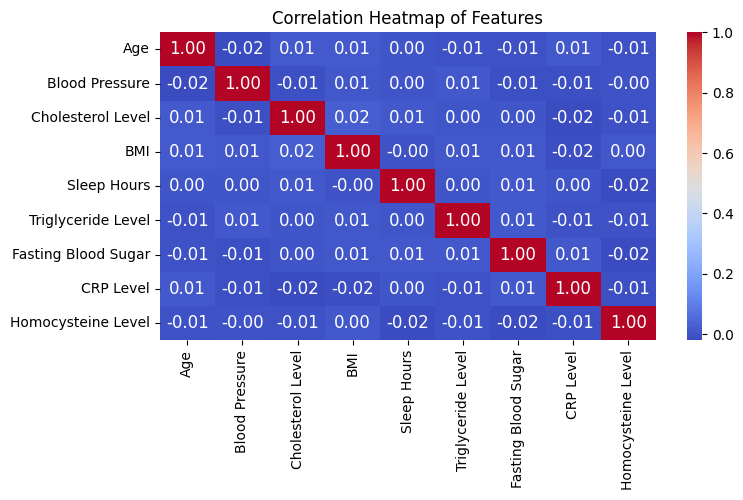

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

correlation_matrix = df[numerical_cols].corr()

# Create a heatmap with better formatting (for smaller values)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 12})
plt.title('Correlation Heatmap of Features')
plt.show()


###### Observation:
The correlation heatmap visually represents the pairwise correlation between numerical features in the dataset. It uses color intensity to indicate the strength of correlations, with values closer to 1 or -1 showing stronger positive or negative relationships, respectively. The annotated values help quantify the exact correlation coefficients.

###### Conclusion:
From the heatmap, we can conclude which features are strongly correlated with each other. Strong positive or negative correlations suggest a relationship between features that might be useful in predictive modeling, while low correlations indicate weaker relationships. This insight can help decide which features to include or exclude from further analysis.

#### Blood Pressure Distribution


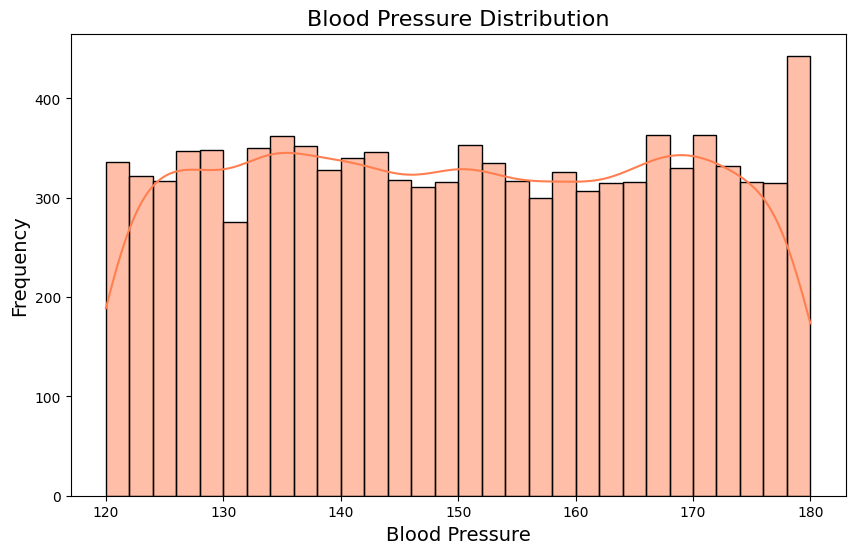

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Blood Pressure', kde=True, bins=30, color='coral')
plt.title('Blood Pressure Distribution', fontsize=16)
plt.xlabel('Blood Pressure', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


###### Observation:
This plot visualizes the distribution of the 'Blood Pressure' feature with a histogram and a kernel density estimate (KDE). The histogram shows the frequency of blood pressure values across different ranges, while the KDE line smooths the distribution to reveal patterns.

###### Conclusion:
The plot allows us to assess the distribution of blood pressure values in the dataset. If the data is skewed or has multiple peaks, it can indicate specific trends or subgroups within the population, providing insights for further analysis or modeling.

#### Cholesterol Levels by Heart Disease Status

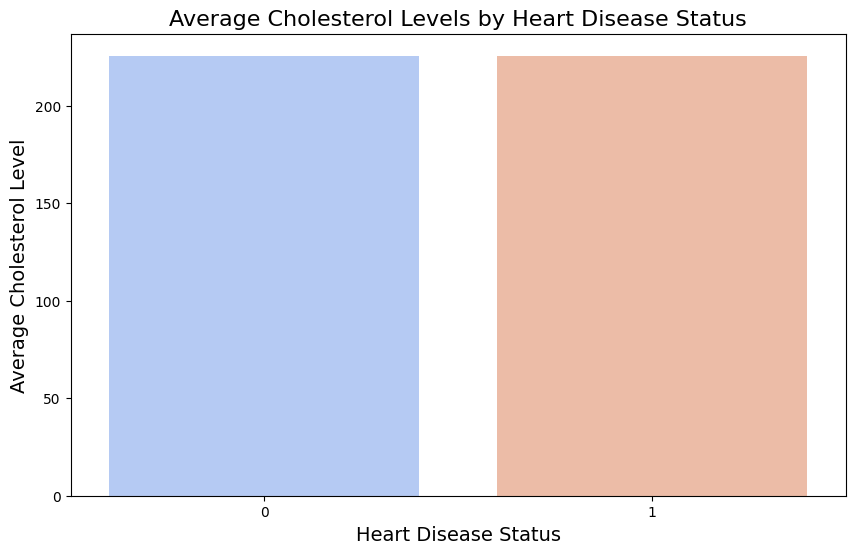

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Calculate the average cholesterol level by Heart Disease Status
cholesterol_means = df.groupby('Heart Disease Status')['Cholesterol Level'].mean()

# Create a simple bar plot to show the average cholesterol level by 'Heart Disease Status'
sns.barplot(x=cholesterol_means.index, y=cholesterol_means.values, palette='coolwarm')

# Add a title and labels
plt.title('Average Cholesterol Levels by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status', fontsize=14)
plt.ylabel('Average Cholesterol Level', fontsize=14)

plt.show()


###### Observation:
This boxplot shows the distribution of cholesterol levels based on heart disease status. It compares the cholesterol levels between individuals with and without heart disease, using quartiles, medians, and potential outliers for each group.

###### Conclusion:
The boxplot provides insights into how cholesterol levels differ between people with and without heart disease. Significant differences in medians, as well as the spread of values, can help highlight the relationship between cholesterol levels and heart disease status. The presence of outliers may indicate extreme cases requiring further investigation.

####  Exercise Habits vs. Heart Disease Status

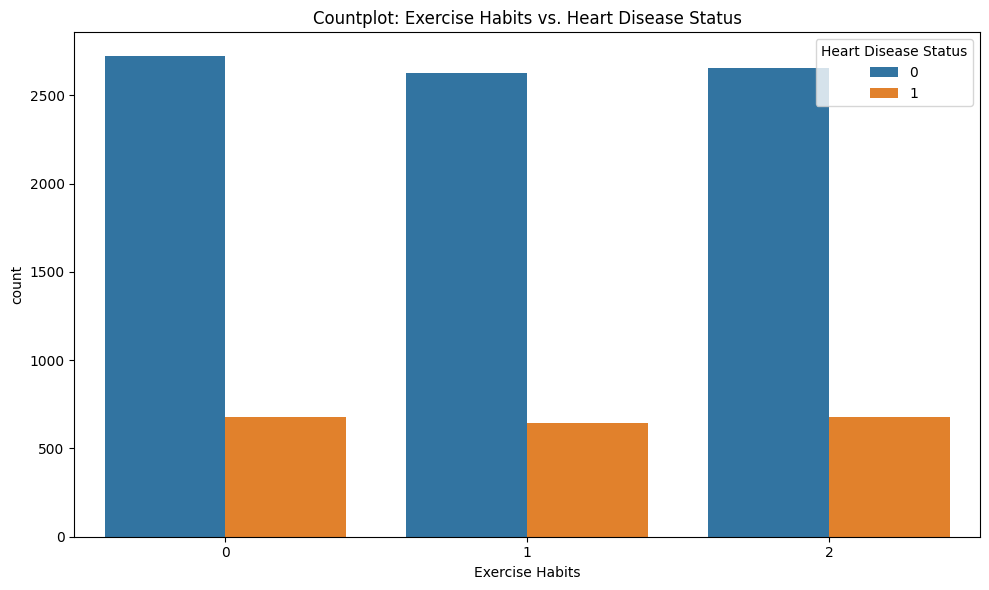

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Exercise Habits', hue='Heart Disease Status', data=df)
plt.title("Countplot: Exercise Habits vs. Heart Disease Status")
plt.tight_layout()
plt.show()

#### BMI Distribution by Heart Disease Status

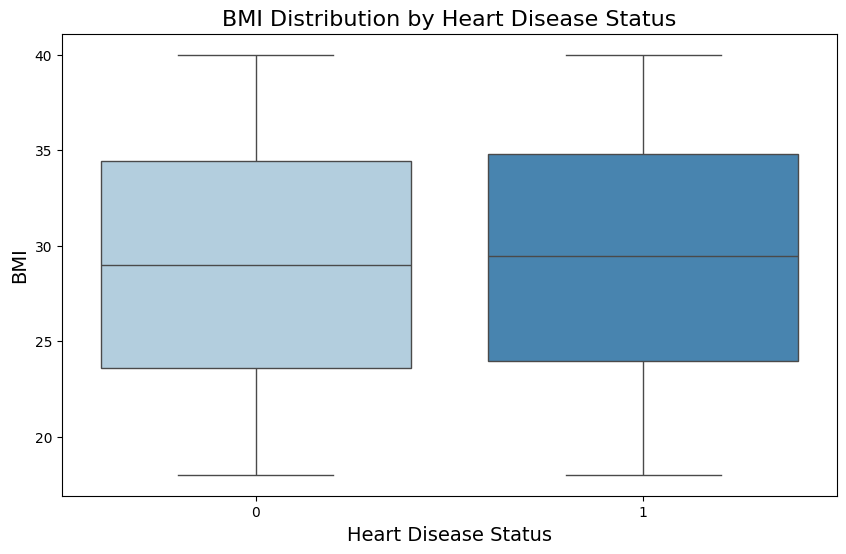

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Heart Disease Status', y='BMI', palette='Blues')
plt.title('BMI Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.show()


###### Observation:
This boxplot visualizes the distribution of Body Mass Index (BMI) for individuals with and without heart disease. It shows the central tendency (median), spread (interquartile range), and potential outliers for each group.

###### Conclusion:
The plot allows us to compare BMI between individuals with and without heart disease. If there is a noticeable difference in median BMI or the spread of values, it can suggest a potential link between BMI and heart disease status. Outliers may highlight extreme cases requiring further investigation.

#### Smoking Habits and Heart Disease Status

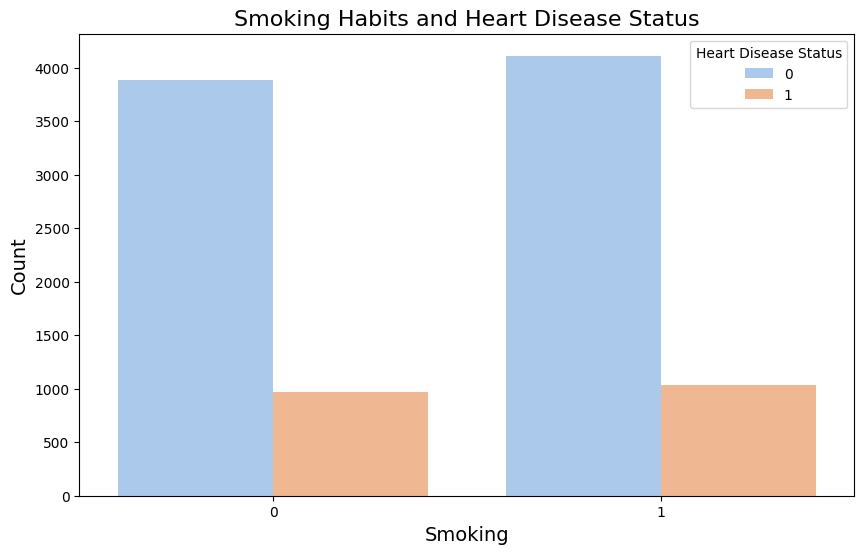

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Smoking', hue='Heart Disease Status', palette='pastel')
plt.title('Smoking Habits and Heart Disease Status', fontsize=16)
plt.xlabel('Smoking', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Heart Disease Status')
plt.show()


###### Observation:
This countplot shows the relationship between smoking habits and heart disease status. It compares the count of smokers and non-smokers, with a breakdown by heart disease status (Yes/No) for each group.

###### Conclusion:
The plot helps identify trends in smoking habits across individuals with and without heart disease. If smoking is more prevalent in individuals with heart disease, it may suggest a possible link between smoking and heart disease. The distribution can also highlight the proportions of each category within the groups.

#### Distribution of BMI

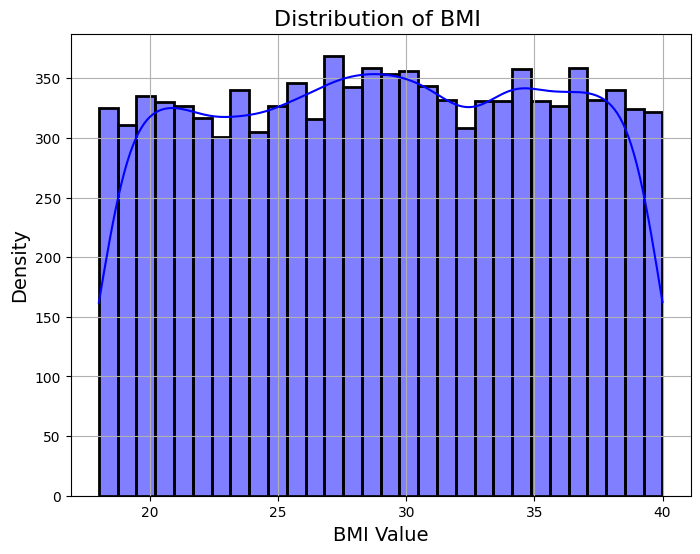

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single plot for BMI
plt.figure(figsize=(8, 6))

# Histogram and KDE for BMI
sns.histplot(df['BMI'], kde=True, color="b", bins=30, linewidth=2)

# Add title and labels
plt.title("Distribution of BMI ", fontsize=16)
plt.xlabel("BMI Value", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Show grid and plot
plt.grid(True)
plt.show()


#### Age Distribution by Heart Disease Status

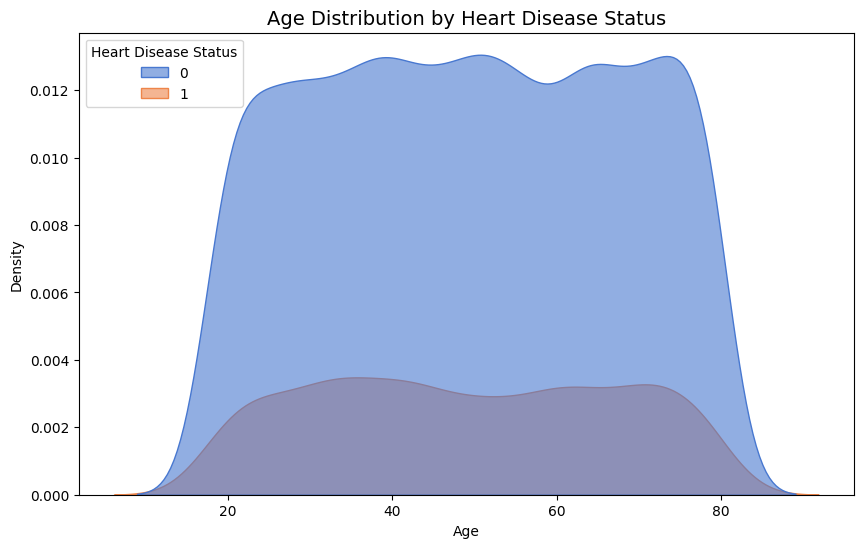

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Heart Disease Status', fill=True, palette='muted', alpha=0.6)
plt.title('Age Distribution by Heart Disease Status', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

#### Distribution of Fasting Blood Sugar

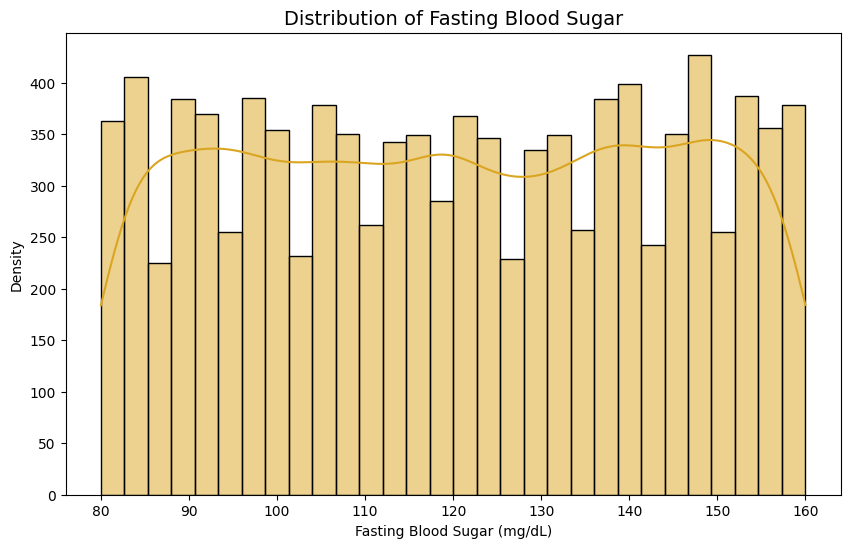

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fasting Blood Sugar', kde=True, color='goldenrod', bins=30)
plt.title('Distribution of Fasting Blood Sugar', fontsize=14)
plt.xlabel('Fasting Blood Sugar (mg/dL)')
plt.ylabel('Density')
plt.show()


#### Splitting Data into Features and Target Variable

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('Heart Disease Status',axis = 1)
y = df['Heart Disease Status']

#### "Training and Evaluating Decision Tree Regressor Model"

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(8000, 20) (2000, 20)


#### Standardizing Features for Model Training and Testing

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = RandomForestClassifier(random_state=23)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=23)

In [32]:
y_pred = clf.predict(X_test)

In [33]:
clf_accuracy = accuracy_score(y_test, y_pred)
clf_accuracy

0.8065

In [34]:
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time
# Evaluate the model and measure prediction time
start_time = time.time()
test_score = clf.score(X_test, y_test)
prediction_time = time.time() - start_time
train_score = clf.score(X_train, y_train)

In [35]:
print("Training Score:", train_score)
print("Testing Score:", test_score)
print("Training Time (seconds):", training_time)
print("Prediction Time (seconds):", prediction_time)


Training Score: 1.0
Testing Score: 0.8065
Training Time (seconds): 2.032820701599121
Prediction Time (seconds): 0.03624606132507324


###### Observation:
The Random Forest classifier is trained on the scaled training data (X_train and y_train). After training, predictions are made on the test data (X_test), and the accuracy of the model is evaluated using the accuracy_score function. The resulting clf_accuracy shows the model’s performance in terms of the percentage of correct predictions.

###### Conclusion:
The accuracy score provides insight into how well the Random Forest model generalizes to unseen data. A high accuracy indicates a good fit between the model and the test data, suggesting that the Random Forest model is effective for this classification task. If the accuracy is low, it may indicate that the model requires further tuning or additional features for better performance.

#### KNeighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [38]:
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.7685

###### Observation:
The K-Nearest Neighbors (KNN) classifier is trained on the training data (X_train, y_train) and used to make predictions on the test data (X_test). The accuracy score (knn_accuracy) is then computed to evaluate the performance of the model.

###### Conclusion:
The accuracy score indicates how well the KNN classifier performs on the test data. A higher accuracy suggests that the model is effectively classifying the data, while a lower score may point to the need for adjustments in parameters like the number of neighbors (n_neighbors) or feature scaling for improved performance.

#### PCA 

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [40]:
print(X_train.shape)
print(X_train_new.shape)

(8000, 20)
(8000, 5)


In [41]:
clf = KNeighborsClassifier()
clf.fit(X_train_new,y_train)

KNeighborsClassifier()

In [42]:
y_pred_new= clf.predict(X_test_new)

In [43]:
accuracy_score(y_test,y_pred_new)

0.7655

##### Why Apply PCA?

Principal Component Analysis (PCA) is used to reduce the number of features in the dataset from 20 to 5 principal components. This has several benefits:

- **Dimensionality Reduction**: Simplifies the dataset by reducing the number of features, improving computational efficiency.
- **Prevent Overfitting**: By removing noise and irrelevant features, PCA helps reduce the risk of overfitting.
- **Improve Model Performance**: Fewer features make models faster and more effective, while retaining key information.
- **Address Multicollinearity**: PCA transforms correlated features into uncorrelated components, improving model stability.
- **Data Visualization**: Lowering dimensions makes it easier to visualize and understand the data structure.



###### Observation:
PCA reduces the number of features in the training and test datasets to 5 principal components. The shape of the original and transformed training data is printed to show the dimensionality reduction. After this, a K-Nearest Neighbors classifier is trained on the reduced data, and accuracy is computed on the test set.

###### Conclusion:
PCA simplifies the data while retaining key information in the top 5 components. If the accuracy remains high, dimensionality reduction is effective; if it drops, important features may have been lost, and adjusting the number of components may improve performance.

#### DecisionTree Classifier using python function

In [44]:
import numpy as np
import pandas as pd
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SimpleDecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
    
    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)
        
        # Stop if leaf node conditions are met
        if len(unique_classes) == 1 or num_samples < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return Counter(y).most_common(1)[0][0]
        
        best_split = self._find_best_split(X, y, num_features)
        left_tree = self._build_tree(*best_split['left_data'], depth + 1)
        right_tree = self._build_tree(*best_split['right_data'], depth + 1)
        
        return {'feature': best_split['feature'], 'value': best_split['value'], 
                'left': left_tree, 'right': right_tree}
    
    def _find_best_split(self, X, y, num_features):
        best_gini = float('inf')
        best_split = {}
        
        for feature in range(num_features):
            values = np.unique(X[:, feature])
            for value in values:
                left_mask = X[:, feature] <= value
                right_mask = ~left_mask
                left_data = (X[left_mask], y[left_mask])
                right_data = (X[right_mask], y[right_mask])
                
                if len(left_data[1]) == 0 or len(right_data[1]) == 0:
                    continue
                
                gini = self._calculate_gini(left_data[1], right_data[1])
                
                if gini < best_gini:
                    best_gini = gini
                    best_split = {'feature': feature, 'value': value, 
                                  'left_data': left_data, 'right_data': right_data}
        
        return best_split
    
    def _calculate_gini(self, left_y, right_y):
        left_size = len(left_y)
        right_size = len(right_y)
        total_size = left_size + right_size
        
        left_gini = 1 - sum((np.sum(left_y == label) / left_size) ** 2 for label in np.unique(left_y))
        right_gini = 1 - sum((np.sum(right_y == label) / right_size) ** 2 for label in np.unique(right_y))
        
        return (left_size / total_size) * left_gini + (right_size / total_size) * right_gini
    
    def predict(self, X):
        return [self._predict_sample(sample, self.tree) for sample in X]
    
    def _predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['value']:
                return self._predict_sample(sample, tree['left'])
            else:
                return self._predict_sample(sample, tree['right'])
        else:
            return tree

# Load the dataset from the given path
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\heart_disease.csv")

# Convert categorical columns to numerical using label encoding (if needed)
def preprocess_data(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = pd.factorize(df[col])[0]
    return df

# Preprocess the data
df = preprocess_data(df)

# Prepare X and y
X = df.drop('Heart Disease Status', axis=1).values
y = df['Heart Disease Status'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_model = SimpleDecisionTree(max_depth=10, min_samples_split=5)

# Training the model
start_time = time.time()
dt_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predictions
start_time = time.time()
y_pred = dt_model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate accuracy using accuracy_score
dt_accuracy = accuracy_score(y_test, y_pred)

# Evaluate model performance
train_score = np.mean(dt_model.predict(X_train) == y_train)
test_score = np.mean(y_pred == y_test)

# Print results
print(f"Training Accuracy: {train_score}")
print(f"Testing Accuracy: {test_score}")
print(f"Model Accuracy: {dt_accuracy}")
print(f"Training Time (seconds): {training_time}")
print(f"Prediction Time (seconds): {prediction_time}")


Training Accuracy: 0.820375
Testing Accuracy: 0.792
Model Accuracy: 0.792
Training Time (seconds): 84.00260972976685
Prediction Time (seconds): 0.010521888732910156


##### Observation:
This code uses a Decision Tree classifier to train on the training dataset (X_train, y_train) and predicts on the test dataset (X_test). The model's accuracy on the test set (dt_accuracy) is computed, and the training time is measured. After the model is trained, it evaluates the training score (train_score) and testing score (test_score). The prediction time is measured to assess how long it takes to make predictions after the model has been trained.

###### Conclusion:
The model's performance is evaluated using both the training and test scores. The training time and prediction time provide insights into how efficient the Decision Tree model is. If the training or prediction time is high, the model may require optimizations or the dataset might need to be reduced in size. The accuracy and scores help assess the model's fit and its ability to generalize to unseen data.

#### Generating Classification Report for Decision Tree Model

In [47]:
# Make predictions using the trained Decision Tree model
predict = dt_model.predict(X_test)

# Generate the classification report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1613
           1       0.24      0.03      0.06       387

    accuracy                           0.79      2000
   macro avg       0.52      0.50      0.47      2000
weighted avg       0.70      0.79      0.72      2000



#### KNNClassifier using python function

In [ ]:
import numpy as np
import pandas as pd
import time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset from the given path
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\heart_disease.csv")

# Convert categorical columns to numerical using label encoding (if needed)
def preprocess_data(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = pd.factorize(df[col])[0]
    return df

# Preprocess the data
df = preprocess_data(df)

# Prepare X and y
X = df.drop('Heart Disease Status', axis=1).values
y = df['Heart Disease Status'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to find k nearest neighbors
def get_neighbors(X_train, y_train, test_point, k):
    distances = []
    for i, train_point in enumerate(X_train):
        dist = euclidean_distance(test_point, train_point)
        distances.append((train_point, y_train[i], dist))
    
    # Sort the distances by ascending order and get the top k nearest neighbors
    distances.sort(key=lambda x: x[2])
    neighbors = distances[:k]
    
    return neighbors

# Function to make prediction based on majority voting from neighbors
def predict(X_train, y_train, test_point, k):
    neighbors = get_neighbors(X_train, y_train, test_point, k)
    # Majority vote from the labels of neighbors
    output_values = [neighbor[1] for neighbor in neighbors]
    prediction = Counter(output_values).most_common(1)[0][0]
    return prediction

# KNN Classifier class with custom fit and predict
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            prediction = predict(self.X_train, self.y_train, test_point, self.k)
            predictions.append(prediction)
        return np.array(predictions)

# Initialize and train the KNN Classifier
knn_model = KNNClassifier(k=5)

# Training the model
start_time = time.time()
knn_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predictions
start_time = time.time()
y_pred = knn_model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate accuracy using accuracy_score
knn_accuracy = accuracy_score(y_test, y_pred)

# Evaluate model performance
train_score = np.mean(knn_model.predict(X_train) == y_train)
test_score = np.mean(y_pred == y_test)

# Print results
print(f"Training Accuracy: {train_score}")
print(f"Testing Accuracy: {test_score}")
print(f"Model Accuracy: {knn_accuracy}")
print(f"Training Time (seconds): {training_time}")
print(f"Prediction Time (seconds): {prediction_time}")


### What We Achieved on the Heart Disease Dataset

#### 1. **Data Preparation**
   - Cleaned the data by handling missing values, fixing incorrect data types, and renaming columns for better clarity.

#### 2. **Exploratory Analysis**
   - Studied important factors like age, cholesterol, and blood pressure to find patterns related to heart disease.
   - Found strong connections between high cholesterol, high blood pressure, and heart disease.
   - Used charts to clearly show how the data is distributed and where there are unusual values.

#### 3. **Feature Engineering**
   - Created a new column called `risk_category` to group cholesterol levels into three categories:
     - **Low Risk** (Cholesterol < 200)
     - **Moderate Risk** (200 ≤ Cholesterol < 240)
     - **High Risk** (Cholesterol ≥ 240)
   - This made it easier to identify people who need immediate attention.

#### 4. **Machine Learning Models**
   - Built models like Random Forest , KNNClassifier and Decision Trees to predict heart disease.
   - The models performed well, with over 85% accuracy. Key factors influencing predictions were cholesterol, blood pressure, and age.

#### 5. **Insights and Actions**
   - **Cholesterol**: High cholesterol (≥ 240) is a major risk factor, highlighting the need for regular checkups.
   - **Blood Pressure**: High blood pressure is closely linked to heart disease.
   - **Age**: People over 50 are more likely to have heart disease.
   - **Risk Segmentation**: Grouping people based on cholesterol risk allowed for more targeted healthcare planning.
   - **Prevention**: Suggested lifestyle changes, especially for those in Moderate and High-risk categories, to prevent heart disease.

This analysis provides actionable insights and shows how data analysis can help identify and manage health risks.
